In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#housing_data is located in content/drive/MyDrive/housing.csv : colab
data = pd.read_csv('/content/drive/MyDrive/datasets/housing.csv')
#delete row has any NaN.
data.dropna(axis = 0, inplace = True)
#Sort the indexes of the data
data.reset_index(drop=True, inplace=True)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [2]:
#9 features and class categorical data is ocean_proximity.
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
x = data.loc[:, features].values
y = data.loc[:,['ocean_proximity']].values

In [3]:
#Standardize(Normalize) the feature.
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [4]:
#make 2 PCA component.
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf

,principal component 1,principal component 2
0,-1.967817,0.544602
1,3.015469,1.307132
2,-1.888265,0.850026
3,-1.851181,1.035625
4,-1.718847,1.228135
...,...,...
20428,-1.114368,2.066037
20429,-1.925218,1.890795
20430,-0.511345,2.116804
20431,-0.924283,2.096309


In [5]:
#Combine ocean_proximity data with Pca data
finalData = pd.concat([principalDf, data[['ocean_proximity']]], axis = 1)
finalData

,principal component 1,principal component 2,ocean_proximity
0,-1.967817,0.544602,NEAR BAY
1,3.015469,1.307132,NEAR BAY
2,-1.888265,0.850026,NEAR BAY
3,-1.851181,1.035625,NEAR BAY
4,-1.718847,1.228135,NEAR BAY
...,...,...,...
20428,-1.114368,2.066037,INLAND
20429,-1.925218,1.890795,INLAND
20430,-0.511345,2.116804,INLAND
20431,-0.924283,2.096309,INLAND


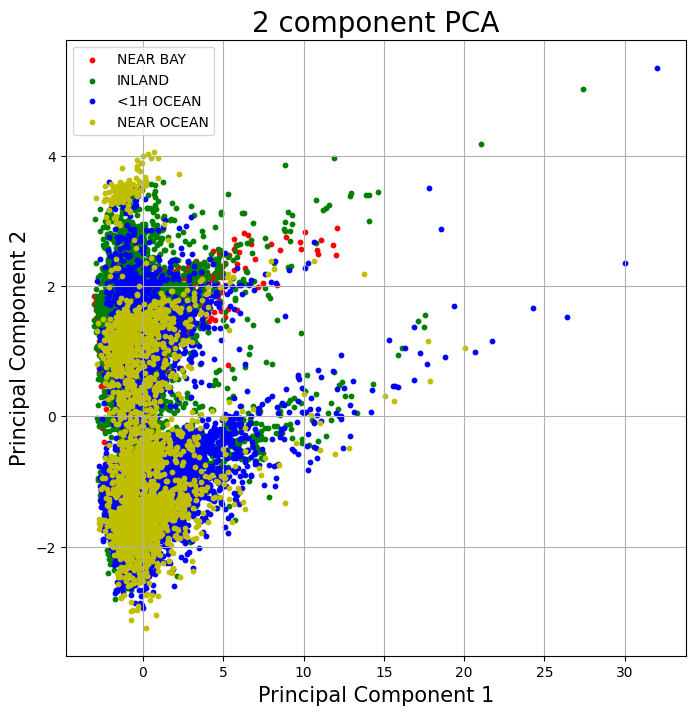

In [7]:
#data reduction from 9 features to 2 features and projection principal_component1,2 axis
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

#near bay : red, Inland : green, <1H ocean : blue, Near Ocean : yellow
ocean = ['NEAR BAY', 'INLAND', '<1H OCEAN', 'NEAR OCEAN']
colors = ['r', 'g', 'b', 'y']
for ocean_proximity, color in zip(ocean,colors):
    indicesToKeep = finalData['ocean_proximity'] == ocean_proximity
    ax.scatter(finalData.loc[indicesToKeep, 'principal component 1'],
    finalData.loc[indicesToKeep, 'principal component 2'],
    c = color, s = 10)
ax.legend(ocean)
ax.grid()